<center><a target="_blank" href="https://academy.constructor.org/"><img src=https://lh3.googleusercontent.com/d/1EmH3Jks5CpJy0zK3JbkvJZkeqWtVcxhB width="500" style="background:none; border:none; box-shadow:none;" /></a> </center>
<hr />

# <h1 align="center"> DST Day 2 Exercises Part 2: Pandas - Video Games </h1> 

<hr />
<center>Constructor Academy, 2025</center>


<div style="background:#EEEDF5;border-top:0.1cm solid #EF475B;border-bottom:0.1cm solid #EF475B;">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm;color:#303030">
        <p><strong>Goal:</strong> Train data cleaning with pandas</p>
        <strong> Outline:</strong>
        <a id='Q0' name="Q0"></a>
        <ul>
            <li> <a style="color:#303030" href='#Q1'>2.1. What’s the first game ever released? (in the dataset)</a> </li>
            <li> <a style="color:#303030" href='#Q2'>2.2. Do game scores vary from year to year?</a></li>
            <li> <a style="color:#303030" href='#Q3'>2.3. What’s the platform with the highest average reviews?</a></li>
            <li> <a style="color:#303030" href='#Q4'>2.4. Are blockbuster games released at a specific time of the year?</a></li>
            <li> <a style="color:#303030" href='#Q5'>Bonus</a></li>
        </ul>
        <strong>Topics Trained:</strong> Dataframes
    </div>
</div>

<nav style="text-align:right"><strong>
        <a style="color:#00BAE5" href="https://constructor.app/learn/courses/f45190af-1e40-4fb3-b0f4-b062878d55a9/view/content/5ff0f127-9f6c-481d-91fb-27af0a765669" title="momentum"> Module 1, The Data Science Toolkit </a>|
        <a style="color:#00BAE5" href="https://constructor.app/learn/courses/f45190af-1e40-4fb3-b0f4-b062878d55a9/view/content/5ff0f127-9f6c-481d-91fb-27af0a765669/5b26b785-271c-4e27-a46b-adeee19f60fe" title="momentum">Day 2, Python Fundamentals </a>|
        <a style="color:#00BAE5" href="https://constructor.app/learn/courses/f45190af-1e40-4fb3-b0f4-b062878d55a9/view/content/5ff0f127-9f6c-481d-91fb-27af0a765669/5b26b785-271c-4e27-a46b-adeee19f60fe/4a25c4b9-6f19-4a3b-accd-3df90c24ea38/d286f643-9c8d-4a8d-bd8f-3bf880080f0a" title="momentum"> Execise Part 2, Data Cleaning and Analysis</a>
</strong></nav>

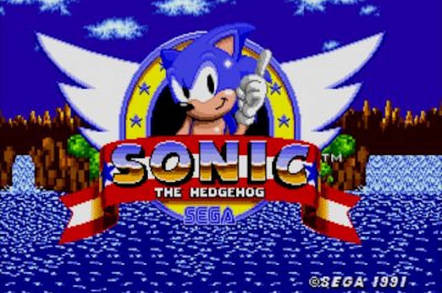

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

<a id='Q1' name="Q1"></a>
## [Exercise 2.1. What’s the first game ever released? (in the dataset)](#Q0)

In [3]:
df = pd.read_csv("data/ign.csv", index_col=0)
df = df.sort_values(by="release_year", ascending=True)
df.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
516,Great,The Walking Dead: The Game -- Episode 1: A New...,/games/the-walking-dead-season-1-episode-1/xbo...,Xbox 360,8.5,Adventure,N,1970,1,1
519,Okay,Gex,/games/gex/ps-149,PlayStation,6.0,Platformer,N,1996,11,25
460,Mediocre,NBA In the Zone,/games/nba-in-the-zone-36223/ps-164,PlayStation,5.0,Sports,N,1996,11,25
461,Good,Magic Carpet,/games/magic-carpet/ps-159,PlayStation,7.5,Action,N,1996,11,25
462,Painful,Power Serve 3D Tennis,/games/power-serve-3d-tennis/ps-167,PlayStation,2.0,Sports,N,1996,11,25


In [4]:
# There is a gap in the release_year column of the data between 1970 and 1996.
# The first game recorded in 1970 is built on Xbox 360, a platform realeased in 2005!!!

# We are going to remove this row
df.drop(df.index[0], inplace=True)

# Python allows the user to write anonymous functions
# We can combine the last three columns to assemble a full date and then to convert it to a datetime

df["release_date"] = df[["release_year", "release_month", "release_day"]].apply(
    lambda x: dt.datetime(*x), axis=1
)

#one more way to solve it:
# date = lambda row: str(row.release_day) + '-' + str(row.release_month) + '-' + str(row.release_year)
# df['release_date'] = df.apply(date, axis=1)

# Notice the * above, it is used to decompose the created tuple from the three cells:
# release_year, release_month, release_day that were joined together

df = df.sort_values(by="release_date", ascending=True)

print(df.iloc[0])

score_phrase                             Good
title                               Baku Baku
url               /games/baku-baku/saturn-194
platform                               Saturn
score                                     7.0
genre                                  Puzzle
editors_choice                              N
release_year                             1996
release_month                               6
release_day                                18
release_date              1996-06-18 00:00:00
Name: 515, dtype: object


### 	Excursion: Transforming columns into datetime

It's a frequent problem, that you would like to transform dates stored in multiple columns like in this case `release_year`, `release_month` and `release_day` into the datetime format.
In the previous section we did this by using `.apply` together with the `datetime` method from the `datetime` package.
However, this operation is pretty slow as we can test easily: 

In [5]:
%%time

df[["release_year", "release_month", "release_day"]].apply(
    lambda x: dt.datetime(*x), axis=1
)

CPU times: user 85 ms, sys: 2.43 ms, total: 87.4 ms
Wall time: 86.5 ms


515     1996-06-18
514     1996-09-25
488     1996-09-25
487     1996-11-02
486     1996-11-14
           ...    
18451   2016-09-22
18453   2016-09-22
18452   2016-09-22
18454   2016-09-22
18450   2016-09-22
Length: 18624, dtype: datetime64[ns]

For this small dataset this might be ok. However, it won't be acceptable for bigger data sets. Luckily, there is a function in pandas which also can do this conversion to datetime.

However, if you apply it on our dataset, it will throw an error:

```python
pd.to_datetime(df[["release_year", "release_month", "release_day"]])
```

```
ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing
```

One workaround (that you can find on stackoverflow) is to transform the date first to a string before converting it into datetime. However, this is similarly slow.

In [6]:
%%time

pd.to_datetime(
    df[["release_year", "release_month", "release_day"]].astype(str).apply("-".join, 1),
    format="%Y-%m-%d",
)

CPU times: user 75.7 ms, sys: 2.71 ms, total: 78.4 ms
Wall time: 77.6 ms


515     1996-06-18
514     1996-09-25
488     1996-09-25
487     1996-11-02
486     1996-11-14
           ...    
18451   2016-09-22
18453   2016-09-22
18452   2016-09-22
18454   2016-09-22
18450   2016-09-22
Length: 18624, dtype: datetime64[ns]

A much better solution is to simply rename the columns, so that the `to_datetime` method can identify the columns. This does the same job around 100 times faster!

In [7]:
%%time

pd.to_datetime(
    df[["release_year", "release_month", "release_day"]].rename(
        columns={"release_year": "year", "release_month": "month", "release_day": "day"}
    )
)

CPU times: user 4.51 ms, sys: 991 µs, total: 5.5 ms
Wall time: 4.59 ms


515     1996-06-18
514     1996-09-25
488     1996-09-25
487     1996-11-02
486     1996-11-14
           ...    
18451   2016-09-22
18453   2016-09-22
18452   2016-09-22
18454   2016-09-22
18450   2016-09-22
Length: 18624, dtype: datetime64[ns]

<a id='Q2' name="Q2"></a>
## [Exercise 2.2. Do game scores vary from year to year?](#Q0)

In [8]:
# We can use the groupby function together with the agg. 
# With agg we create new columns and use them for satistics
year_score_df = df.groupby(["release_year"], sort = True).agg(average_score=('score', 'mean')).reset_index()

year_score_df


,release_year,average_score
0,1996,6.161745
1,1997,6.566341
2,1998,6.930678
3,1999,6.983484
4,2000,6.693589
5,2001,7.120494
6,2002,6.978526
7,2003,7.198246
8,2004,7.170712
9,2005,7.222426


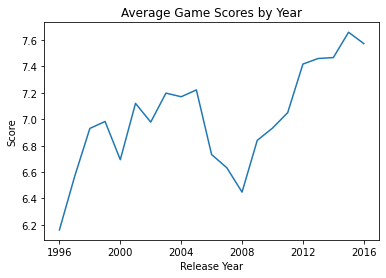

In [9]:
# We can use matplotlib to produce visuals
# We provide one setting after the other to configure the graph

plt.plot(year_score_df["release_year"].astype("int"), year_score_df["average_score"])
plt.xticks(
    np.arange(
        min(year_score_df["release_year"]), max(year_score_df["release_year"]) + 1, 4
    )
)
plt.ylabel("Score")
plt.xlabel("Release Year")
plt.title("Average Game Scores by Year")

plt.show()

<a id='Q3' name="Q3"></a>
## [Exercise 2.3. What’s the platform with the highest average reviews?](#Q0)

In [10]:
# We groupby platform and apply statistics
platform_score_df = (
    df.groupby("platform")
    .agg(support=("platform", "count"), average_score=("score", "mean"))
    .reset_index()
    .sort_values(by="average_score", ascending=False)
)

platform_score_df.head(10)

,platform,support,average_score
40,SteamOS,1,8.900000
52,WonderSwan Color,1,8.600000
36,Pocket PC,1,8.500000
16,Macintosh,81,8.120988
43,TurboGrafx-CD,3,8.000000
3,Atari 5200,2,8.000000
45,Web Games,1,8.000000
28,Ouya,1,8.000000
8,Game Boy,22,7.813636
22,New Nintendo 3DS,2,7.750000


We see a lot of platforms whith only very few game releases.
If we only want to consider more popular platforms the simplest method is to set a threshold.
Let's consider only platforms with at least 10 releases:

In [11]:
top5_df = platform_score_df[platform_score_df["support"] > 10].head(5)

In [12]:
top5_df

,platform,support,average_score
16,Macintosh,81,8.120988
8,Game Boy,22,7.813636
41,Super NES,33,7.727273
56,iPad,99,7.672727
33,PlayStation 4,277,7.663538


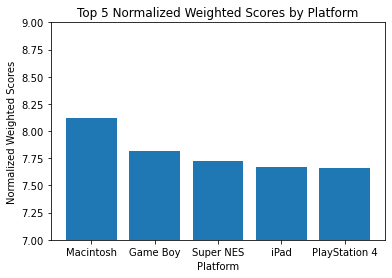

In [13]:
plt.bar(top5_df["platform"], top5_df["average_score"])
plt.ylim([7, 9])
plt.ylabel("Normalized Weighted Scores")
plt.xlabel("Platform")
plt.title('Top 5 Normalized Weighted Scores by Platform')

plt.show()


<a id='Q4' name="Q4"></a>
## [Exercise 2.4. Are blockbuster games released at a specific time of the year?](#Q0)

Blockbuster usually refers to a highly successful game in terms of financial return. Since we don't have this information available we will consider games as blockbusters if they got a very high rating.

In [14]:
# We find games that have scored as: Amazing and Masterpiece
blockbusters_df = df[df["score_phrase"].isin({"Amazing", "Masterpiece"})]
blockbusters_df.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day,release_date
514,Amazing,Super Mario 64,/games/super-mario-64/n64-606,Nintendo 64,9.8,Platformer,Y,1996,9,25,1996-09-25
484,Amazing,Wave Race 64,/games/wave-race-64/n64-81,Nintendo 64,9.7,Racing,Y,1996,11,15,1996-11-15
500,Amazing,NHL FaceOff,/games/nhl-faceoff/ps-555,PlayStation,9.0,Sports,N,1996,11,25,1996-11-25
599,Amazing,WipEout XL,/games/wipeout-2097/ps-473,PlayStation,9.0,Racing,Y,1996,11,26,1996-11-26
443,Amazing,WipEout XL,/games/wipeout-2097/ps-473,PlayStation,9.0,Racing,Y,1996,11,26,1996-11-26


In [15]:
# then we groupby the release_month and aggregate statistics (count)
blockbusters_series = blockbusters_df.groupby("release_month").agg("size")

blockbusters_series

release_month
1      93
2     138
3     168
4     109
5      93
6     114
7     111
8     163
9     208
10    248
11    298
12    116
dtype: int64

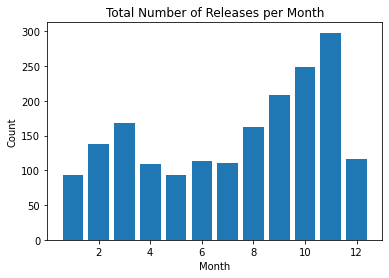

In [16]:
plt.bar(blockbusters_series.index, blockbusters_series.values)
plt.ylabel("Count")
plt.xlabel("Month")
plt.title("Total Number of Releases per Month")

plt.show()

### Bonus: Relative number of blockbusters per month

In [17]:
df_block = (
    df.groupby("release_month")
    .agg(
        num_blockbuster=(
            "score_phrase",
            lambda x: x.isin({"Amazing", "Masterpiece"}).sum(),
        ),
        num_total=("release_month", "size"),
    )
    .reset_index()
)
df_block["rel_block"] = df_block["num_blockbuster"] / df_block["num_total"] * 100

In [18]:
df_block

,release_month,num_blockbuster,num_total,rel_block
0,1,93,1127,8.251996
1,2,138,1327,10.399397
2,3,168,1573,10.680229
3,4,109,1264,8.623418
4,5,93,1143,8.136483
5,6,114,1483,7.687121
6,7,111,1190,9.327731
7,8,163,1338,12.182362
8,9,208,1707,12.185120
9,10,248,2310,10.735931


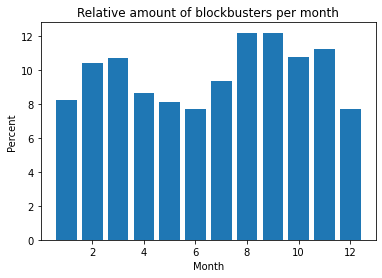

In [19]:
plt.bar(df_block["release_month"], df_block["rel_block"])
plt.ylabel("Percent")
plt.xlabel("Month")
plt.title("Relative amount of blockbusters per month")

plt.show()

<a id='Q5' name="Q5"></a>
## [Bonus: Sales Analysis](#Q0)

In [20]:
# we load the sales dataset
df_sales = pd.read_csv("data/vgsales.csv", index_col=0)
df_sales.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Merging both data sets
In order to combine the sales data with the ign data set we have to merge them. However, there are several problems. One is that the naming of the platforms is different in both data sets.

In [21]:
df_sales.groupby("Platform").agg("size")

Platform
2600     133
3DO        3
3DS      509
DC        52
DS      2163
GB        98
GBA      822
GC       556
GEN       27
GG         1
N64      319
NES       98
NG        12
PC       960
PCFX       1
PS      1196
PS2     2161
PS3     1329
PS4      336
PSP     1213
PSV      413
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1325
WiiU     143
X360    1265
XB       824
XOne     213
dtype: int64

In [22]:
df_ign = df.copy()
df_ign.groupby("platform").agg("size")

platform
Android                   39
Arcade                    11
Atari 2600                 5
Atari 5200                 2
Commodore 64/128           6
DVD / HD Video Game        1
Dreamcast                286
Dreamcast VMU              1
Game Boy                  22
Game Boy Advance         623
Game Boy Color           356
Game.Com                   3
GameCube                 509
Genesis                   58
Linux                     10
Lynx                      82
Macintosh                 81
Master System             13
N-Gage                    30
NES                       49
NeoGeo                    10
NeoGeo Pocket Color       31
New Nintendo 3DS           2
Nintendo 3DS             225
Nintendo 64              302
Nintendo 64DD              7
Nintendo DS             1045
Nintendo DSi             254
Ouya                       1
PC                      3370
PlayStation              952
PlayStation 2           1686
PlayStation 3           1356
PlayStation 4            277
PlayS

There is not really a much better solution than manually search for corresponding platforms and write a dictionary for replacing the names.

In [23]:
# Write a dictionary of platform names
platform_dict = {
    "DS": "Nintendo DS",
    "PS2": "PlayStation 2",
    "PS3": "PlayStation 3",
    "Wii": "Wii",
    "X360": "Xbox 360",
    "PSP": "PlayStation Portable",
    "PS": "PlayStation",
    "PC": "PC",
    "XB": "Xbox",
    "GBA": "Game Boy Advance",
    "GC": "GameCube",
    "3DS": "Nintendo 3DS",
    "PSV": "PlayStation Vita",
    "PS4": "PlayStation 4",
    "N64": "Nintendo 64",
    "SNES": "Super NES",
    "XOne": "Xbox One",
    "SAT": "Saturn",
    "WiiU": "Wii U",
    "2600": "Atari 2600",
    "NES": "NES",
    "GB": "Game Boy",
    "DC": "Dreamcast",
    "GEN": "Genesis",
    "NG": "N-Gage",
    "WS": "WonderSwan",
    "TG16": "TurboGrafx-16",
}  # Can't match -  SCD', '3DO', 'PCFX' 'GG'

df_sales["Platform"] = df_sales["Platform"].replace(platform_dict)

In [24]:
df_sales.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,Game Boy,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


The next problem is that the years are in `float` format. The reason for this is that we have some `NaN` entries. `NaN` can not be expressed in `integer` format, that's why pandas automatically transforms it into `float`.

The easiest way to handle this is to remove rows with missing values completely from our dataframe. Let's remove all the rows that have `NaN` as year.

In [25]:
sum(df_sales["Year"].isna())

271

There are 271 `NaN`s in the `Year` column. We can remove them with the `dropna` method.

In [26]:
df_sales = df_sales.dropna(subset=["Year"])

After removing all the `NaN`s we can convert the `Year` column into `int`.

In [27]:
df_sales["Year"] = df_sales["Year"].astype("int")
df_sales.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,Game Boy,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [28]:
# check for duplicates
df_sales[df_sales[["Name", "Platform", "Year"]].duplicated(keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
604,Madden NFL 13,PlayStation 3,2012,Sports,Electronic Arts,2.11,0.23,0.0,0.22,2.56
16130,Madden NFL 13,PlayStation 3,2012,Sports,Electronic Arts,0.00,0.01,0.0,0.00,0.01


There is only one duplicate. Let's only keep the first row, since the numbers seem to be more realistic.

In [29]:
# check for duplicates
df_sales_clean = df_sales[
    ~df_sales[["Name", "Platform", "Year"]].duplicated(keep="first")
].copy()

In [30]:
# merge datasets on Name, Platform and Year
df_result = pd.merge(
    df_ign,
    df_sales_clean,
    left_on=["title", "release_year", "platform"],
    right_on=["Name", "Year", "Platform"],
    how="inner",
)

In [31]:
df_result.shape

(6166, 21)

## Release of blockbusters based on global sales

Now we can use this merged data set to answer for example the previous question on the release of blockbusters based on global sales. 

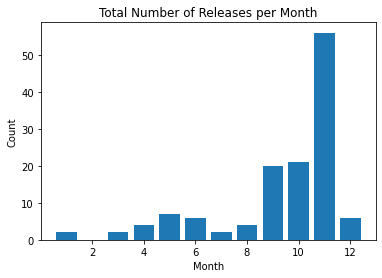

In [32]:
# we filter for specific characteristics, like "Global_Sales" > 5

blockbusters_df = df_result[
                    (df_result["Global_Sales"] > 5)]

blockbusters_df = blockbusters_df.groupby('release_month') \
       .agg(count=('release_month', 'count')) \
       .reset_index()

plt.bar(blockbusters_df["release_month"], blockbusters_df["count"])
plt.ylabel("Count")
plt.xlabel("Month")
plt.title('Total Number of Releases per Month')

plt.show()


<div style="border-top:0.1cm solid #EF475B"></div>
    <strong><a href='#Q0'><div style="text-align: right"> <h3>End of this Notebook.</h3></div></a></strong>